## Desafio 2 PNL


*   Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.
*   Probar términos de interés y explicar similitudes en el espacio de embeddings (sacar conclusiones entre palabras similitudes y diferencias)
*   Graficarlos.
*   Obtener conclusiones.

### Dependencias

In [53]:
!pip install --upgrade --force-reinstall numpy gensim pandas

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata

In [54]:
import nltk
nltk.download('punkt')
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
import multiprocessing
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Datos
Utilizaremos como dataset el libro Moby Dick de Herman Melville proveniente del proyecto gutenberg.

In [17]:
nltk.download('gutenberg')
nltk.download('punkt_tab')

book_files = ['melville-moby_dick.txt']
sentences = []

for file in book_files:
  book_sentences = gutenberg.sents(file)
  sentences.extend([[word.lower() for word in sent if word.isalpha()] for sent in book_sentences])

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Modelo

In [55]:
from gensim.models.callbacks import CallbackAny2Vec
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss


In [56]:
w2v_model = Word2Vec(min_count=5,    # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=2,       # cant de palabras antes y desp de la predicha
                     vector_size=100,       # dimensionalidad de los vectores
                     negative=20,    # cantidad de negative samples... 0 es no se usa
                     workers=1,      # si tienen más cores pueden cambiar este valor
                     sg=1)           # modelo 0:CBOW  1:skipgram

In [57]:
w2v_model.build_vocab(sentences)

In [58]:
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 10059


In [59]:
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 4204


### Entrenando al modelo

In [60]:
w2v_model.train(sentences,
                 total_examples=w2v_model.corpus_count,
                 epochs=30,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 1798269.625
Loss after epoch 1: 1216245.625
Loss after epoch 2: 1168786.75
Loss after epoch 3: 1091788.5
Loss after epoch 4: 1084774.5
Loss after epoch 5: 1075157.0
Loss after epoch 6: 1060711.0
Loss after epoch 7: 1018951.0
Loss after epoch 8: 1008744.0
Loss after epoch 9: 998082.0
Loss after epoch 10: 991895.0
Loss after epoch 11: 982012.0
Loss after epoch 12: 974657.0
Loss after epoch 13: 964851.0
Loss after epoch 14: 958589.0
Loss after epoch 15: 935172.0
Loss after epoch 16: 916770.0
Loss after epoch 17: 907668.0
Loss after epoch 18: 903616.0
Loss after epoch 19: 899654.0
Loss after epoch 20: 889044.0
Loss after epoch 21: 890426.0
Loss after epoch 22: 885766.0
Loss after epoch 23: 881264.0
Loss after epoch 24: 879738.0
Loss after epoch 25: 878220.0
Loss after epoch 26: 873280.0
Loss after epoch 27: 873520.0
Loss after epoch 28: 868044.0
Loss after epoch 29: 869736.0


(4231914, 6550830)

### 4 - Evaluando el modelo

In [41]:
w2v_model.wv.most_similar(positive=["ship"], topn=10)

[('vessel', 0.5375268459320068),
 ('craft', 0.5317735075950623),
 ('ding', 0.513092577457428),
 ('rigged', 0.45820027589797974),
 ('moody', 0.4575078785419464),
 ('timbers', 0.4543507397174835),
 ('authority', 0.45367303490638733),
 ('song', 0.4494699239730835),
 ('schooner', 0.4493936598300934),
 ('goney', 0.4485059976577759)]

**Conclusiones**: Todas las palabras tienen una relación estrecha con un barco.


*   Vessel, Craft, Ding (Dinghy), Timbers, Schooner: Son todas formas de llamar a embarcaciones o tipos de embarcaciones.
*   Rigged: Conjunto de velas de un barco.
*   Moody: Probablemente se refiere al humor de los marineros dentro del barco.
*   Authority: Probablemente se refiere a la jerarquia dentro de los marineros del barco.
*   Song: Canciones que eran cantadas por los marineros.
*   Goney (Gooney): Tipo de ave marina. Albatros en español, similar a la gaviota.



In [39]:
w2v_model.wv.most_similar(positive=["whale"], topn=10)

[('sperm', 0.6740378141403198),
 ('whales', 0.6121435761451721),
 ('beheaded', 0.5992588996887207),
 ('grampus', 0.5943945050239563),
 ('designated', 0.5807713866233826),
 ('elephant', 0.5788158178329468),
 ('heidelburgh', 0.5675187706947327),
 ('painting', 0.5643758177757263),
 ('volume', 0.5600870251655579),
 ('aged', 0.5577319860458374)]

**Conclusiones**: En su mayoria son relaciones directas con el animal, otras pueden ser expresiones que se usan frecuentemente al describir al animal.


*   Sperm: Especie de ballena "Sperm Whale".
*   Whales: Plural de whale.
*   Beheaded: "Decapitada", probablemente relacionado a la caza de ballenas.
*   Grampus: Especie de delfín.
*   Designated: No tiene relación directa con el animal. Puede ser utilizado frecuentemente cuando se clasifica o se define la especie de un animal.
*   Elephant: Probablemente se usa frecuentemente para comparar el tamaño de la ballena.
*   Heidelburgh: Hace referencia al "Heidelburgh Tun", un barril de vino famoso. En el libro se compara este barril con la cabeza de la ballena.
*   Painting: Probablemente en el libro se hace referencia a pinturas de las ballenas.
*   Volume: Referencia a la dimensión de las ballenas.
*   Aged: Probablemente se hace referencia a las ballenas adultas en el libro.

In [33]:
w2v_model.wv.most_similar(positive=["wind"], topn=10)

[('sky', 0.6041075587272644),
 ('space', 0.5834466218948364),
 ('euroclydon', 0.5563244223594666),
 ('rises', 0.5296376347541809),
 ('dreadful', 0.5229902863502502),
 ('tempestuous', 0.5164811611175537),
 ('thence', 0.5160410404205322),
 ('wait', 0.5140104293823242),
 ('gam', 0.5132687091827393),
 ('revelry', 0.5117452144622803)]

**Conclusiones**: Casi todas las palabras estan altamente relacionadas al termino.


*   Sky, Space: Hacen referencia a la naturaleza.
*   Euroclydon: Un tipo de viento que sopla en el mediterraneo.
*   Rises: Puede referir a que levanta la velocidad del viento.
*   Dreadful: "Terrible", puede referir a las condiciones que se vivian con vientos fuertes.
*   Tempestuous: Tormenta fuerte.
*   Thence: Palabra antigua del ingles que indica dirección, probablemente utilizada para indicar de donde venia el viento.
*   Wait: Probablemente utilizado en situaciones de poco viento, esperando a que este aumente.
*   Gam: Reunión entre barcos cazadores de ballenas. Probablemente se realizaba cuando el viento era bajo.
*   Revelry: ~ "Fiesta". Palabra no tan relacionada, podria ocurrir que festejaran cuando el viento era bajo.


In [47]:
w2v_model.wv.most_similar(positive=["harpoon"], topn=5)

[('weapon', 0.5787127614021301),
 ('knife', 0.56232088804245),
 ('boarding', 0.5620742440223694),
 ('tattooing', 0.5585732460021973),
 ('prow', 0.5421538949012756)]

**Conclusiones**: Todas las palabras estan relacionadas con el termino.


*   Weapon, Knife: Referencia directa al arma para cazar ballenas.
*   Boarding: Referencia a "Boarding Sword" arma utilizada por marineros / piratas.
*   Tattooing: Probablemente referencia a la apariencia de las personas que utilizaban los harpones como Queequeg.
*   Prow: Proa de un barco, puede ser el lugar desde donde se utilizan los harpones.


Momentos del día

In [64]:
w2v_model.wv.most_similar(positive=["night"], topn=5)

[('winter', 0.5702637434005737),
 ('sunrise', 0.555353045463562),
 ('year', 0.5384345650672913),
 ('month', 0.5356404781341553),
 ('sunday', 0.5325372219085693)]

Números

In [66]:
w2v_model.wv.most_similar(positive=["ten"], topn=5)

[('fifteen', 0.669240415096283),
 ('sixteen', 0.6612465381622314),
 ('seventy', 0.6552239656448364),
 ('eighteen', 0.6471483707427979),
 ('twenty', 0.6375025510787964)]

Unidades de medida

In [79]:
w2v_model.wv.most_similar(positive=["feet"], topn=5)

[('fathoms', 0.6761485934257507),
 ('inches', 0.6157276630401611),
 ('twenty', 0.5973724722862244),
 ('tahiti', 0.5910554528236389),
 ('barrel', 0.5596619248390198)]



*   Fathoms: Unidad de medida equivalente a 6 pies
*   Inches: Pulgadas
*   Tahiti: Isla del pacifico, probablemente se menciona la distancia a la isla
*   Barrel: Unidad de medida de volúmen



### 5 - Visualización 2D

In [48]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model, num_dimensions = 2 ):

    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [51]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=800
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show(renderer="colab") # esto para plotly en colab

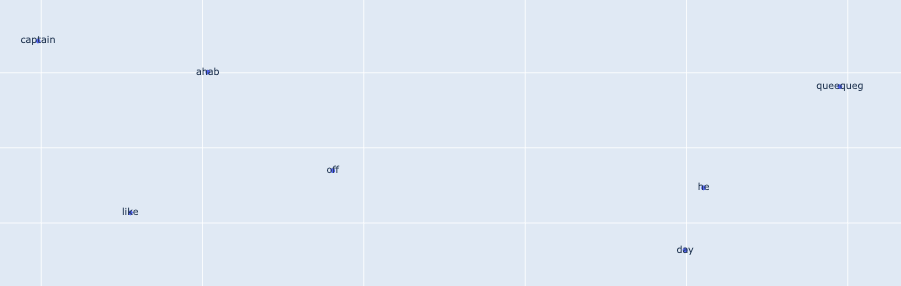

Se pueden ver 3 palabas muy similares juntas: Captain, Ahab (Capitan del barco) y Queequeg (Marinero)

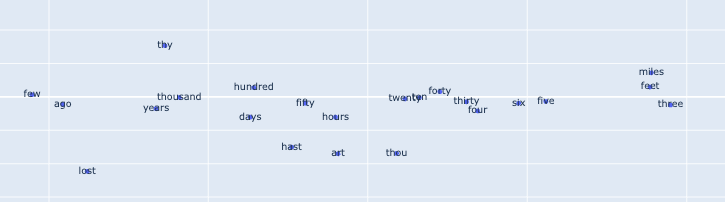

También se capura la relación entre numeros, horas, dias, años, millas, pies.

La palabra "Few" que refiere a cantidad.

La palabra "Ago" que se usa en conjunto con una cantidad de tiempo.

### Visualización 3D

In [52]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="colab") # esto para plotly en colab

El modelo de Word2Vec entrenado sobre Moby-Dick demuestra una notable capacidad para relacionar conceptos propios del universo del libro como términos náuticos (harpoon, sperm, whale, deck, vessel) e identificar personajes y su relación personal (Ahab y Queequeg). A su vez, es capaz de detectar y organizar conceptos más generales como:


*   Números
*   Unidades de medida del tiempo (hour, day, month, yeat, night, day, sunday)
*   Unidades de medida de distancia (miles, feets, inches, fathoms)
*   Sentimientos (fear, sorrow, madness, rage)